In [140]:
# Importing Modules
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
import ast 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Adding Month Column
df['month_name'] = df['job_posted_date'].dt.month_name()
 

In [141]:
# Filter For Data Analyst in US Only
df_da_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]

In [142]:
# Exploading The Skills columns 
df_da_exp = df_da_us.explode('job_skills').copy()

In [ ]:
top_skills = df_da_exp['job_skills'].value_counts().head(5).index

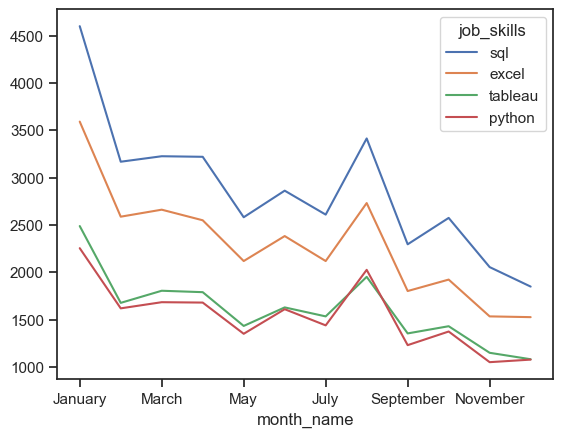

In [144]:
# Trend Of Top Skills Per Month
df_da_pt = df_da_exp.pivot_table(index='month_name',columns='job_skills', aggfunc='size',  fill_value=0)
final_df = df_da_pt.loc[:,top_skills].reindex(['January','February','March',"April", "May", "June",
    "July", "August", "September", "October", "November", "December"]).copy().plot(kind='line')

**Percentage WiseData**

In [146]:
# Total Jobs Per Month
total_jobs = df_da_us.groupby('month_name')['job_title_short'].size()
total_jobs

month_name
April        6049
August       6634
December     3979
February     6124
January      8494
July         5201
June         5683
March        6218
May          4993
November     4531
October      5271
September    4639
Name: job_title_short, dtype: int64

In [165]:
jobs_monthly = df_da_us.groupby('month_name').size()

In [148]:
# This gives us the data in Percentage
final_df = df_da_pt.div(jobs_monthly/100, axis=0).loc[:,top_skills]

In [149]:
final_df = final_df.reindex(["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"])

In [160]:
from matplotlib.ticker import PercentFormatter

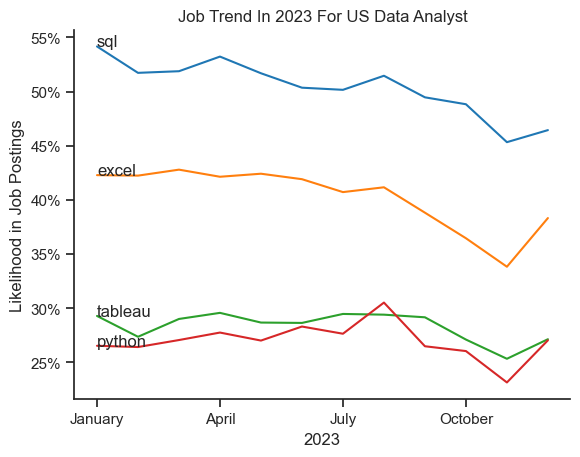

In [164]:
sns.lineplot(data=final_df, legend=False, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
plt.xticks(['January','April','July','October'])
plt.title('Job Trend In 2023 For US Data Analyst')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
for i in range(4):
    plt.text(0, final_df.iloc[0, i] , final_df.columns[i])
sns.despine()
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
